In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

np.random.seed(20171001)
tf.set_random_seed(20171001)
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [2]:
hidden_size = 512

x = tf.placeholder(tf.float32, [None, 784])
w1 = tf.Variable(tf.truncated_normal([784, hidden_size]))
b1 = tf.Variable(tf.zeros([hidden_size]))
z = tf.nn.relu(tf.matmul(x, w1) + b1)

w0 =  tf.Variable(tf.zeros([hidden_size, 784]))
b0 = tf.Variable(tf.zeros([784]))
y = tf.matmul(z, w0) + b0

t = tf.placeholder(tf.float32, [None, 784])

In [3]:
loss = tf.reduce_sum(tf.square(t-y))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [4]:
from PIL import Image
import os
# Handy George
filenames = os.listdir('./teacher2')
imgs = []
for name in filenames:
    img = Image.open('./teacher2/' + name).convert('L')
    img.thumbnail((28, 28))
    img = np.array(img, dtype=np.float32)
    img = 1-np.array(img / 255)
    img = img.reshape(1, 784)
    imgs.append(img)
imgs = np.array(imgs).reshape(10, 784)
def label2im(labels):
    limgs = []
    for label in labels:
        limgs.append(imgs[np.argmax(label)])
    return np.array(limgs).reshape((-1, 784))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
i = 0
for _ in range(1000):
    i += 1
    sess.run(train_step, feed_dict={x: imgs, t: imgs})
    if i % 100 == 0:
        loss_val = sess.run(loss, feed_dict = {x: imgs, t: imgs})
        print("step: %d, loss: %f" % (i, loss_val))

step: 100, loss: 0.045218
step: 200, loss: 0.000001
step: 300, loss: 0.000000
step: 400, loss: 0.000000
step: 500, loss: 0.000000
step: 600, loss: 0.000000
step: 700, loss: 0.000000
step: 800, loss: 0.000000
step: 900, loss: 0.000000
step: 1000, loss: 0.000000


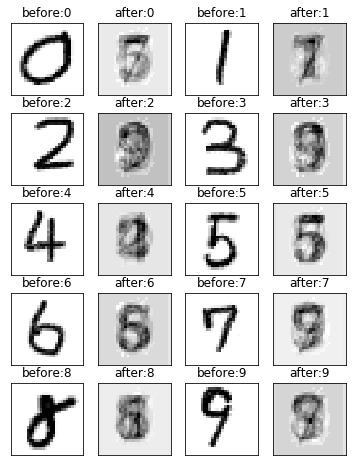

In [7]:
from PIL import Image
import os
filenames = os.listdir('./sample/test_samples')
c = 1
fig = plt.figure(figsize=(6, 8))
labels = []
imgs = []
for name in filenames:
    img = Image.open("./sample/test_samples/" + name).convert('L')
    img.thumbnail((28, 28))
    img = np.array(img, dtype=np.float32)
    img = 1-np.array(img / 255)
    img = img.reshape(1, 784)
    res = sess.run(y, feed_dict={x: img})[0]
    res = res - res[np.argmin(res)]
    res = res / res[np.argmax(res)]

    subplot = fig.add_subplot(5, 4, 2 * c - 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('before:%d' % (c-1))
    subplot.imshow(img.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    
    subplot = fig.add_subplot(5, 4, 2*c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('after:%d' % (c-1))
    subplot.imshow(res.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    c += 1